
***Titanic Dataset Research***
================

In [22]:
# 1st import necessary libraries to analyize the data
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import statsmodels.formula.api as sm

*load the data set*
----

In [23]:
#load the data set#
Tita_df=pd.read_csv('titanic-data.csv')

#the basic data statistics
print Tita_df.head(5)
print '---'*30
print Tita_df.describe()
print Tita_df['Parch'].unique()

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  
--

__Reseach Question__ <br>

_Try to identify some factors that affected people's survival_<br>
_Let's Check for the relationship between survival rate and numbers of family_

In [34]:
#create func to see rate of survival of certain group
def get_group_survived(group_by):
    group_result=Tita_df['Survived'].groupby(Tita_df[group_by]).sum()
    return group_result

def get_group_total(group_by):
    group_result=Tita_df[group_by].groupby(Tita_df[group_by]).count()
    return group_result

In [35]:
##Survived VS Total # of parents / children aboard the Titanic
Parch_survived_groups=get_group_survived("Parch")
Parch_groups=get_group_total('Parch')

##Survived VS Total # of siblings / spouses aboard the Titanic
Sib_survived_groups=get_group_survived('SibSp')
Sib_groups=get_group_total('SibSp')

print Parch_groups,Parch_survived_groups
print Sib_groups,Sib_survived_groups

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
Name: Parch, dtype: int64 Parch
0    233
1     65
2     40
3      3
4      0
5      1
6      0
Name: Survived, dtype: int64
SibSp
0    608
1    209
2     28
3     16
4     18
5      5
8      7
Name: SibSp, dtype: int64 SibSp
0    210
1    112
2     13
3      4
4      3
5      0
8      0
Name: Survived, dtype: int64


_The results seems unclear, take a visual on it_

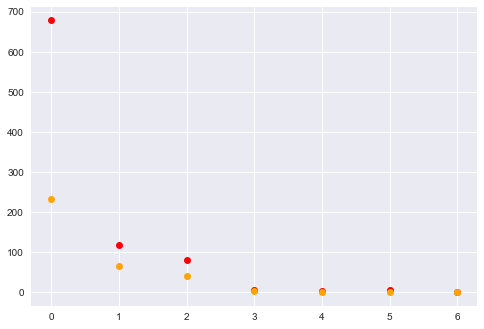

In [36]:
plt.plot(Parch_groups,'ro')
plt.plot(Parch_survived_groups,'ro',color='orange')
plt.show()

_The survival rate between people have different # of parents / children aboard the Titanic seems present a weak connection, since some group with more parents / children tends to have higher probablity of survival,while others are not_

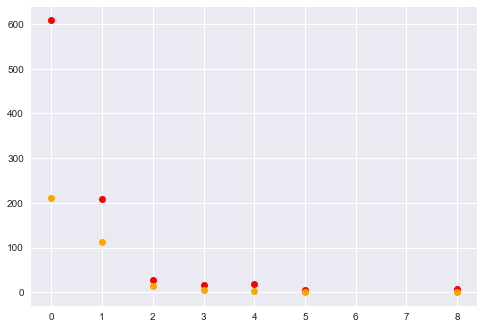

In [37]:
plt.plot(Sib_groups,'ro')
plt.plot(Sib_survived_groups,'ro',color='orange')
plt.show()

_The survival rate between people have different # of siblings/ spouse seems more consistent, which is nagetively related_

In [38]:
#Check the variable 'Age'
Tita_df['Age'].isnull().sum()
Tita_df['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

In [39]:
## Turn Age into groups, to make the relation more esay to see 
def Age_groups(age):
    if age<16:
        return 'Young'
    elif age<50:
        return 'Adult'
    else:
        return 'old'

Age_group=Tita_df['Age'].apply(Age_groups)

In [40]:
HCount_by_sex=get_group_total('Sex')
print HCount_by_sex

Survived_by_sex = get_group_survived('Sex')
print Survived_by_sex

Sex
female    314
male      577
Name: Sex, dtype: int64
Sex
female    233
male      109
Name: Survived, dtype: int64


In [14]:
groups=2
index=np.arange(groups)

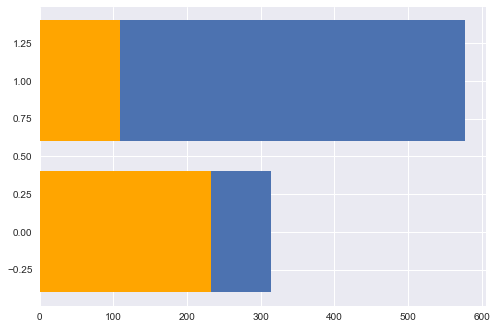

In [15]:
plt.barh(index,HCount_by_sex)
plt.barh(index,Survived_by_sex ,color='orange')
plt.show()

In [16]:
Survived_by_Pclass=Tita_df['Survived'].groupby(Tita_df['Pclass']).sum()
Hcount_Pclass=Tita_df['Pclass'].groupby(Tita_df['Pclass']).count()

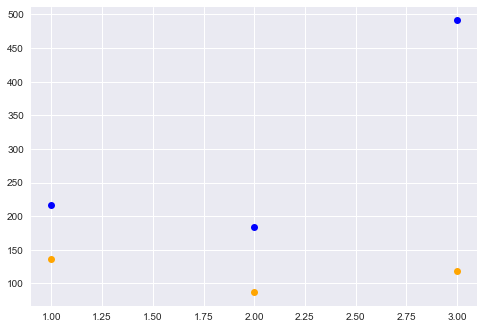

In [17]:
plt.plot(Hcount_Pclass,'ro',color='blue')
plt.plot(Survived_by_Pclass,'ro',color='orange')

plt.show()

In [18]:
result=sm.ols(formula='Survived~Parch+Sex+SibSp+Fare',data=Tita_df).fit()
print result.params
print result.summary()

Intercept      0.711140
Sex[T.male]   -0.542190
Parch         -0.027126
SibSp         -0.047481
Fare           0.001832
dtype: float64
                            OLS Regression Results                            
Dep. Variable:               Survived   R-squared:                       0.338
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     112.9
Date:                Tue, 01 Aug 2017   Prob (F-statistic):           8.23e-78
Time:                        12:29:45   Log-Likelihood:                -438.42
No. Observations:                 891   AIC:                             886.8
Df Residuals:                     886   BIC:                             910.8
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.